In [23]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [121]:
df = pd.read_excel('CMV786_age.xlsx')
df

,Subject ID,Sex,Age
0,HIP00110,Male,54.557153
1,HIP00169,Male,40.681725
2,HIP00594,Male,20.632444
3,HIP00602,Female,44.678987
4,HIP00614,Male,26.688569
...,...,...,...
781,Keck0116,Female,19
782,Keck0117,Male,34
783,Keck0118,Male,28
784,Keck0119,Female,24


In [122]:
def parse_infile(infile, keyword, match='total'):
    complete_match = []
    df = pd.read_csv(infile,sep='\t',low_memory=False,skiprows=4)
    cm = df[df.columns[1]].tolist()
    #print(cm)
    pm = df[df.columns[2]].tolist()
    CM = {x[:x.rfind(' (')]:float(x[x.rfind('(')+1:x.rfind(',')]) for x in cm if x!='-'}
    PM = {x[:x.rfind(' (')]:float(x[x.rfind('(')+1:x.rfind(',')]) for x in pm if x!='-'}
    frac = 0
    for each in list(CM.keys()):
        if keyword in each:
            frac+=CM[each]
    if match=='CM':
        return frac
    for each in list(PM.keys()):
        if keyword in each:
            frac+=PM[each]      
    return frac

In [123]:
import os
from matplotlib import pyplot as plt
base1 = 'CMV_786_1e-4_tcranno_output/CMV_pos'
base2 = 'CMV_786_1e-4_tcranno_output/CMV_neg'
base3 = 'CMV_786_1e-4_tcranno_output/CMV_unknown'
all_files1 = [base1+'/'+x for x in os.listdir(base1) if x.endswith('tcr2org.tsv')]
all_files2 = [base2+'/'+x for x in os.listdir(base2) if x.endswith('tcr2org.tsv')]
all_files3 = [base3+'/'+x for x in os.listdir(base3) if x.endswith('tcr2org.tsv')]
all_files = all_files1+all_files2+all_files3

ages = df['Age'].tolist()
subjects = df['Subject ID'].tolist()
AGES = {subjects[i]:int(ages[i]) for i in range(len(subjects)) if ages[i]!='Unknown'}
int_ages = []
fracs = []
my_pal = {"0-9": 'lightskyblue', "10-19": "royalblue", "20-29":"crimson", "30-39": "orangered", "40-49":"orange", 
          "50-59":"gold","60-69":"yellowgreen","70-79":"forestgreen"}
GROUP={"0-9":[],"10-19":[],"20-29":[],"30-39":[],"40-49":[],"50-59":[],"60-69":[],"70-79":[]}
group_idx = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79"]
for infile in all_files:
    subject = (infile.split('/')[-1]).split('_1e-4')[0]
    if subject not in AGES:
        continue
    else:
        age_group = group_idx[AGES[subject] // 10]
        frac = parse_infile(infile, 'SARS-CoV2', match='total')
        GROUP[age_group].append(frac)

df2 = pd.DataFrame(list(zip(GROUP["0-9"],GROUP["10-19"],GROUP["20-29"],GROUP["30-39"],GROUP["40-49"],GROUP["50-59"],GROUP["60-69"],
                   GROUP["70-79"])), columns = group_idx)
plt.figure(figsize=(8,7))
ax = sns.violinplot(data=df2, order=group_idx, cut=0, width=1,palette=my_pal,saturation=0.85)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('SARS-CoV2 specific fraction', fontsize=12)
#plt.ylim([-0.01,0.3])
plt.title('Pre-pandemic Healthy Population',fontsize=15)
plt.savefig('CMV786_age_vs_sars_cov2_spe_frac.png',dpi=300,bbox_inches='tight')

ages = df['Age'].tolist()
subjects = df['Subject ID'].tolist()
AGES = {subjects[i]:int(ages[i]) for i in range(len(subjects)) if ages[i]!='Unknown'}
int_ages = []
fracs = []
my_pal = {"0-9": 'lightskyblue', "10-19": "royalblue", "20-29":"crimson", "30-39": "orangered", "40-49":"orange", 
          "50-59":"gold","60-69":"yellowgreen","70-79":"forestgreen"}
GROUP={"0-9":[],"10-19":[],"20-29":[],"30-39":[],"40-49":[],"50-59":[],"60-69":[],"70-79":[]}
group_idx = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79"]
for infile in all_files:
    subject = (infile.split('/')[-1]).split('_1e-4')[0]
    if subject not in AGES:
        continue
    else:
        age_group = group_idx[AGES[subject] // 10]
        frac = parse_infile(infile, 'SARS-CoV2', match='total')
        GROUP[age_group].append(frac)

df2 = pd.DataFrame(list(zip(GROUP["0-9"]+GROUP["10-19"]+GROUP["20-29"]+GROUP["30-39"]+GROUP["40-49"]+GROUP["50-59"]+
            GROUP["60-69"]+GROUP["70-79"],[group_idx[0]]*len(GROUP[group_idx[0]])+[group_idx[1]]*len(GROUP[group_idx[1]])+
                   [group_idx[2]]*len(GROUP[group_idx[2]])+[group_idx[3]]*len(GROUP[group_idx[3]])+
                   [group_idx[4]]*len(GROUP[group_idx[4]])+[group_idx[5]]*len(GROUP[group_idx[5]])+
                   [group_idx[6]]*len(GROUP[group_idx[6]])+[group_idx[7]]*len(GROUP[group_idx[7]]))), 
                   columns = ['Fraction','Keyword'])
plt.figure(figsize=(8,7))
sns.boxplot(x=df2['Keyword'],y=df2['Fraction'], width = 0.8, palette=my_pal, showfliers = False,saturation=0.85)
#ax = sns.violinplot(data=df2, order=group_idx, cut=0, width=1,palette=my_pal,saturation=0.85)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('SARS-CoV2 specific fraction', fontsize=12)
#plt.ylim([-0.01,0.3])
plt.title('Pre-pandemic Healthy Population',fontsize=15)
plt.savefig('CMV786_age_vs_sars_cov2_spe_frac.boxplot.png',dpi=300,bbox_inches='tight')
#plt.show()

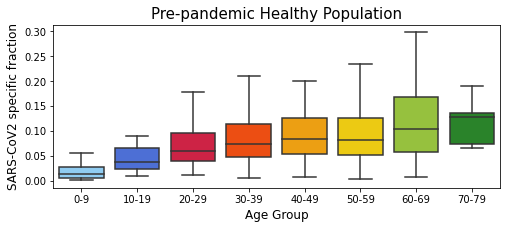

In [124]:
ages = df['Age'].tolist()
subjects = df['Subject ID'].tolist()
AGES = {subjects[i]:int(ages[i]) for i in range(len(subjects)) if ages[i]!='Unknown'}
int_ages = []
fracs = []
my_pal = {"0-9": 'lightskyblue', "10-19": "royalblue", "20-29":"crimson", "30-39": "orangered", "40-49":"orange", 
          "50-59":"gold","60-69":"yellowgreen","70-79":"forestgreen"}
GROUP={"0-9":[],"10-19":[],"20-29":[],"30-39":[],"40-49":[],"50-59":[],"60-69":[],"70-79":[]}
group_idx = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79"]
for infile in all_files:
    subject = (infile.split('/')[-1]).split('_1e-4')[0]
    if subject not in AGES:
        continue
    else:
        age_group = group_idx[AGES[subject] // 10]
        frac = parse_infile(infile, 'SARS-CoV2', match='total')
        GROUP[age_group].append(frac)

df2 = pd.DataFrame(list(zip(GROUP["0-9"]+GROUP["10-19"]+GROUP["20-29"]+GROUP["30-39"]+GROUP["40-49"]+GROUP["50-59"]+
            GROUP["60-69"]+GROUP["70-79"],[group_idx[0]]*len(GROUP[group_idx[0]])+[group_idx[1]]*len(GROUP[group_idx[1]])+
                   [group_idx[2]]*len(GROUP[group_idx[2]])+[group_idx[3]]*len(GROUP[group_idx[3]])+
                   [group_idx[4]]*len(GROUP[group_idx[4]])+[group_idx[5]]*len(GROUP[group_idx[5]])+
                   [group_idx[6]]*len(GROUP[group_idx[6]])+[group_idx[7]]*len(GROUP[group_idx[7]]))), 
                   columns = ['Fraction','Keyword'])
plt.figure(figsize=(8,3))
sns.boxplot(x=df2['Keyword'],y=df2['Fraction'], width = 0.8, palette=my_pal, showfliers = False,saturation=0.85)
#ax = sns.violinplot(data=df2, order=group_idx, cut=0, width=1,palette=my_pal,saturation=0.85)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('SARS-CoV2 specific fraction', fontsize=12)
#plt.ylim([-0.01,0.3])
plt.title('Pre-pandemic Healthy Population',fontsize=15)
plt.savefig('CMV786_age_vs_sars_cov2_spe_frac.boxplot.8x3.png',dpi=300,bbox_inches='tight')
#plt.show()

In [125]:
df = pd.read_csv('covid1485_ages.txt',sep='\t')
df

,sample_name,Age
0,ADIR0000014_TCRB,43 Years
1,ADIR0000021_TCRB,43 Years
2,ADIR0000086_TCRB,35 Years
3,ADIR0000093_TCRB,38 Years
4,ADIRP0000023_TCRB,31 Years
...,...,...
1223,BS-GN-0015-T0-replacement_TCRB,78 Years
1224,BS-GN-0016-T0-replacement_TCRB,66 Years
1225,BS-GN-01-T0-replacement_TCRB,35 Years
1226,BS-GN-06-T0-replacement_TCRB,71 Years


In [126]:
base='covid1485_1e-4_tcranno_output'
all_files = [base+'/'+x for x in os.listdir(base) if x.endswith('tcr2org.tsv')]

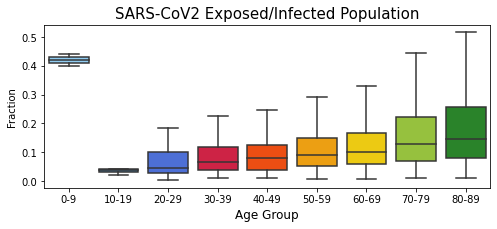

In [128]:
ages = df['Age'].tolist()
subjects = df['sample_name'].tolist()
AGES = {subjects[i]:int(ages[i].split()[0]) for i in range(len(subjects)) if ages[i]!='Unknown'}
my_pal = {"0-9": 'lightskyblue','10-19':'steelblue',"20-29": "royalblue", "30-39":"crimson", "40-49": "orangered", "50-59":"orange", 
          "60-69":"gold","70-79":"yellowgreen","80-89":"forestgreen"}
GROUP={"0-9":[],"10-19":[],"20-29":[],"30-39":[],"40-49":[],"50-59":[],"60-69":[],"70-79":[],"80-89":[]}
group_idx = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79",'80-89']
for infile in all_files:
    subject = (infile.split('/')[-1]).split('_1e-4')[0]
    if subject not in AGES:
        continue
    else:
        age_group = group_idx[AGES[subject] // 10]
        frac = parse_infile(infile, 'SARS-CoV2', match='total')
        GROUP[age_group].append(frac)

df2 = pd.DataFrame(list(zip(GROUP["0-9"]+GROUP["10-19"]+GROUP["20-29"]+GROUP["30-39"]+GROUP["40-49"]+GROUP["50-59"]+
            GROUP["60-69"]+GROUP["70-79"]+GROUP["80-89"],[group_idx[0]]*len(GROUP[group_idx[0]])+
                [group_idx[1]]*len(GROUP[group_idx[1]])+[group_idx[2]]*len(GROUP[group_idx[2]])+
                [group_idx[3]]*len(GROUP[group_idx[3]])+[group_idx[4]]*len(GROUP[group_idx[4]])+
                [group_idx[5]]*len(GROUP[group_idx[5]])+[group_idx[6]]*len(GROUP[group_idx[6]])+
                [group_idx[7]]*len(GROUP[group_idx[7]])+[group_idx[8]]*len(GROUP[group_idx[8]]))), 
                   columns = ['Fraction','Keyword'])
plt.figure(figsize=(8,3))
sns.boxplot(x=df2['Keyword'],y=df2['Fraction'], width = 0.8, palette=my_pal, showfliers = False,saturation=0.85)
plt.xlabel('Age Group', fontsize=12)
#plt.ylabel('SARS-CoV2 specific fraction', fontsize=12)
plt.title('SARS-CoV2 Exposed/Infected Population',fontsize=15)
plt.savefig('COVID_age_vs_sars_cov2_spe_frac.boxplot.8x3.png',dpi=300,bbox_inches='tight')